In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Read CSV file into a DataFrame
df_results = pd.read_csv('simulation_results_.csv')

# Convert the 'Transitions' column from string to dictionary
df_results['Transitions'] = df_results['Transitions'].apply(ast.literal_eval)

# Extract unique transition keys from all simulations
all_transition_keys = []
for transitions_dict in df_results['Transitions']:
    all_transition_keys.extend(transitions_dict.keys())

# Remove duplicates to get unique transition keys
unique_transition_keys = list(set(all_transition_keys))

# Initialize a DataFrame to store transition counts
transition_counts_df = pd.DataFrame(index=df_results['Simulation'], columns=unique_transition_keys)

In [16]:
# Fill the DataFrame with transition counts, ensuring missing transitions are set to 0
for i, transitions_dict in enumerate(df_results['Transitions']):
    counts = 0
    counts = [transitions_dict.get(key, 0) for key in unique_transition_keys]
    transition_counts_df.loc[i + 1] = counts

# Calculate mean and standard deviation for each transition
mean_counts = transition_counts_df.mean()
std_dev_counts = transition_counts_df.std()

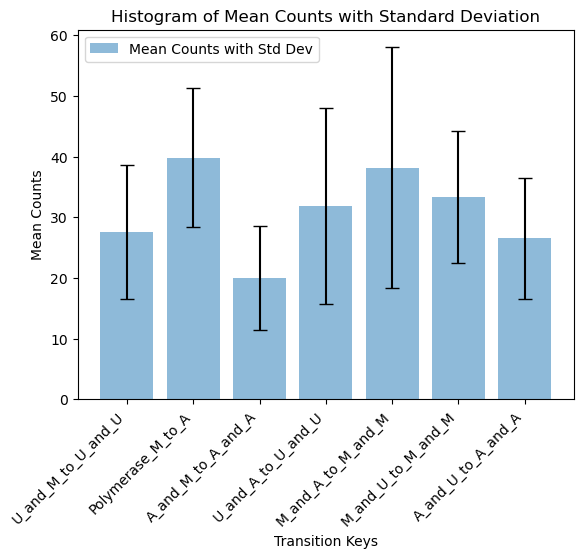

In [17]:
# Plot histograms
plt.bar(mean_counts.index, mean_counts, yerr=std_dev_counts, alpha=0.5, capsize=5, label='Mean Counts with Std Dev')

# Add legend
plt.legend()

# Set labels and title
plt.xlabel('Transition Keys')
plt.ylabel('Mean Counts')
plt.title('Histogram of Mean Counts with Standard Deviation')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()